<center><img src="https://github.com/girishksahu/INSAID2021/blob/SMART_AI_Learning/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Machine Learning Intermediate Project - Drug Prediction for pharmaceutical company</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2021/blob/ML-Intermediate-Drug-Prediction/inlabs-logo.png?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Pre-Processing**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Your client inLabs for this project is a pharmaceutical company.

    - They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection.

    - Their research and development team have recently developed five types of drugs to fight against chronic throat infection.

    - They want to quickly release the drug in the market so that they could cure people and increase revenue for the company.

    - Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health.
    - The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team.


**<h3>Current Scenario:</h3>**

- The R&D group has invited some groups of people to test the drug, but going through each person’s health report might take a lot of time and cause a delay in launching the drug in the market. 

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The current process suffers from the following problems:**
    - Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.

    - Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.
    
    - This process is time-consuming and wastage of resources.

- The company has hired you as a data science consultant.

    - They want to automate the process of assigning the drug according to their health report.


<a name = Section21></a>
### **Your Role**

- You are given a dataset containing the health report of the people from the test group.

- Your task is to build a multi-class classification model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

<a name = Section21></a>
### **Project Deliverables**
- Deliverable: **Drug classification.**

- Machine Learning Task: **Multi-class classification.**

- Target Variable: **Drug**
- Win Condition: **N/A (best possible model)**

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on Accuracy score.

<center><img src="https://github.com/girishksahu/INSAID2021/blob/ML-Intermediate-Drug-Prediction/pharmaceutical-industry.jpg?raw=true"></center>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [357]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.8.5


<a name = Section32></a>
### **3.2 Importing Libraries**

In [358]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import plot_roc_curve
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier 
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.3
numpy version 1.19.2
seaborn version 0.11.0
sklearn version 0.24.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **dataset** consists of the information about **Health Metrics** of the person for transcribing the drug to that person without any side effect.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 160 | 7 | 8.8 KB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Id**   | Unique Id of the sample |
|02| **Age**      | Age of the person|
|03| **Sex**        | The sex of the person(M and F)|
|04| **BP**          | Blood pressure of the person|
|05| **Cholesterol**      | The level of cholesterol in a person's body |
|06| **Na_to_K**           | Sodium and potassium ratio|
|07| **Drug**     | Contains 5 classes of drugs encoded as(drug A : 3, drug B : 4, drug C : 2, drug X : 0, drug Y : 1) |

- The **Test dataset** consists of the information about **Health Metrics** of the person for transcribing the drug to that person without any side effect and **Drug** need to be predicted.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 40 | 6 | 1.9 KB | 

<br>

- Load inLabs health metrics Data to be used for Training and Validation

In [359]:
# Id is unique ID for record and can be used as label for index
drug_master_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021/ML-Intermediate-Drug-Prediction/drug_train.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', drug_master_data.shape)

# Output first 10 data rows
drug_master_data.head(10)


Shape of the Training and Validation dataset: (160, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Id,,,,,,
79,32,F,LOW,NORMAL,10.840,drugX
197,52,M,NORMAL,HIGH,9.894,drugX
38,39,F,NORMAL,NORMAL,9.709,drugX
24,33,F,LOW,HIGH,33.486,DrugY
122,34,M,NORMAL,HIGH,22.456,DrugY
195,56,F,LOW,HIGH,11.567,drugC
29,45,M,LOW,HIGH,17.951,DrugY
19,32,F,HIGH,NORMAL,25.974,DrugY
143,74,M,HIGH,NORMAL,15.436,DrugY


- Load inLabs health metrics Test Data to be used for Prediction

In [360]:
# Id is unique ID for record and can be used as label for index
drug_test_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021/ML-Intermediate-Drug-Prediction/drug_test.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Test dataset to be used for Prediction:', drug_test_data.shape)

# Output first 10 data rows
drug_test_data.head(10)

Shape of the Test dataset to be used for Prediction: (40, 5)


,Age,Sex,BP,Cholesterol,Na_to_K
Id,,,,,
95,36,M,LOW,NORMAL,11.424
15,16,F,HIGH,NORMAL,15.516
30,18,F,NORMAL,NORMAL,8.750
158,59,F,LOW,HIGH,10.444
128,47,M,LOW,NORMAL,33.542
115,51,M,HIGH,HIGH,18.295
69,18,F,HIGH,NORMAL,24.276
170,28,F,NORMAL,HIGH,12.879
174,42,M,HIGH,NORMAL,12.766


In [361]:
# Check for any missing values
any(drug_master_data.isna().sum())

False

In [362]:
#check if any duplicate row
any(drug_master_data.duplicated())

False

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [363]:
#Basic statistical details for numeric variables
drug_master_data.describe()

,Age,Na_to_K
count,160.000000,160.000000
mean,45.387500,16.194988
std,16.101481,7.254689
min,15.000000,6.269000
25%,32.000000,10.445250
50%,46.000000,14.076500
75%,58.250000,19.480750
max,74.000000,38.247000


**Observations:**
- Total count for numeric variable is same as 160 which confirms that there are no missing values.
- They have mean and median almost same which means normal distribution.

In [364]:
#Basic statistical details for categorical variables
drug_master_data.describe(include=[np.object])

,Sex,BP,Cholesterol,Drug
count,160,160,160,160
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,83,62,88,76


**Observations:**
- Total count for all categorical variables is same as 160 which confirms that there are no missing values. 
- **Sex** feature has majority of category as **M** 
- **BP** feature has majority of category as **HIGH** 
- **Cholestrol** feature has majority of category as **HIGH** 
- **Drug** feature has majority of category as **DrugY** 

In [365]:
drug_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          160 non-null    int64  
 1   Sex          160 non-null    object 
 2   BP           160 non-null    object 
 3   Cholesterol  160 non-null    object 
 4   Na_to_K      160 non-null    float64
 5   Drug         160 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ KB


In [366]:
# Columns list can be handy and useful for further steps
drug_master_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [367]:
# Check column data types and any null values
drug_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          160 non-null    int64  
 1   Sex          160 non-null    object 
 2   BP           160 non-null    object 
 3   Cholesterol  160 non-null    object 
 4   Na_to_K      160 non-null    float64
 5   Drug         160 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ KB


In [368]:
drug_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          40 non-null     int64  
 1   Sex          40 non-null     object 
 2   BP           40 non-null     object 
 3   Cholesterol  40 non-null     object 
 4   Na_to_K      40 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ KB


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [369]:
profile = ProfileReport(df=drug_master_data)
profile.to_file(output_file='Drug-Prediction Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


Trying with Sweetviz which has automated EDA

In [370]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


Trying with dtale which has automated EDA

In [371]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [372]:
import sweetviz as sv
sweet_report = sv.analyze(drug_master_data)
sweet_report.show_html('Drug_Prediction_report.html')


Report Drug_Prediction_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [373]:
import dtale
import pandas as pd
d = dtale.show(drug_master_data)
d.open_browser()

<a name = Section52></a>
### **5.2 Data Pre-Processing**

- There are no missing values and data appears clean so far but we need to pre process few features before EDA and Model Evaluation

<a name = Section53></a>
### **5.3 Data Post-Profiling**

- We can run the report to get latest information

In [374]:
# post_profile=ProfileReport(df=cust_master_data)
# post_profile.to_file(output_file='Customer-classification Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Not Applicable

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

**Q: What is the breakdown of Drugs taken?**

In [375]:
drug_master_data['Drug'].value_counts()

DrugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

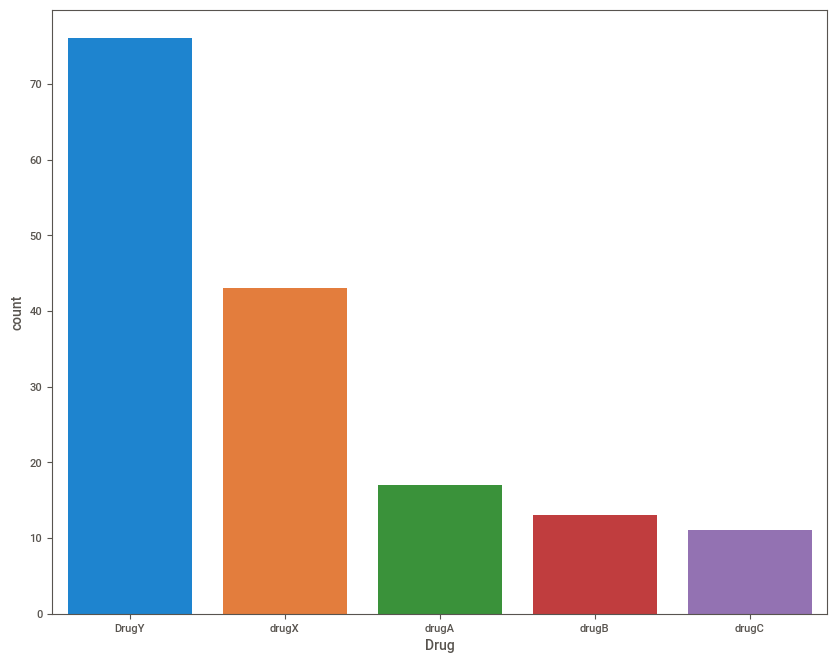

In [376]:
plt.figure(figsize=(10,8))
sns.countplot(x='Drug',data=drug_master_data,order=drug_master_data['Drug'].value_counts().index)

**Q: What is the breakdown of Drugs taken with respect to Age and Na_to_K?**

<AxesSubplot:xlabel='Drug'>

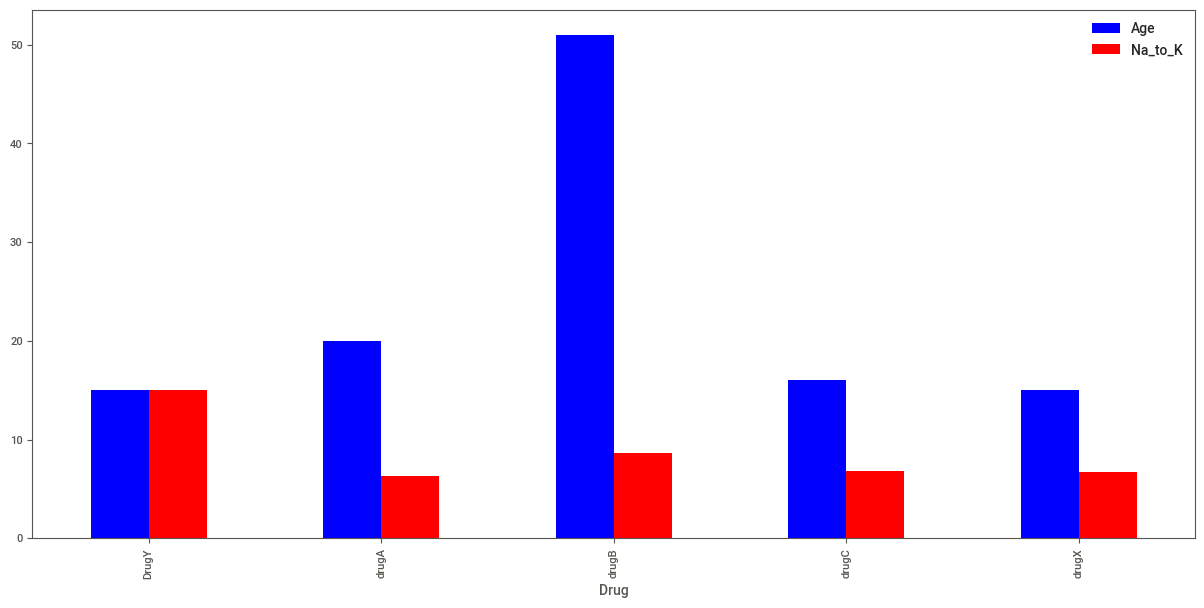

In [377]:
drug_master_data.groupby(['Drug'])[['Age','Na_to_K']].min().plot(kind='bar', figsize=(15, 7), color=['blue','red'])

**Q: What is the breakdown of Drugs taken with respect to Sex?**

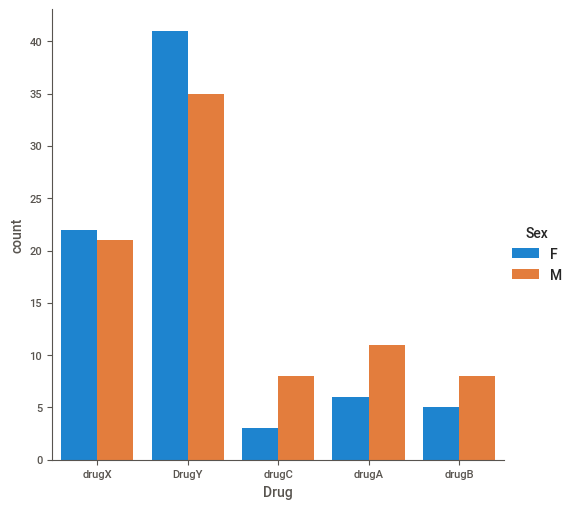

In [378]:
sns.factorplot('Drug', data=drug_master_data, hue='Sex', kind='count')

**Q: What is the breakdown of Drugs taken with respect to BP?**

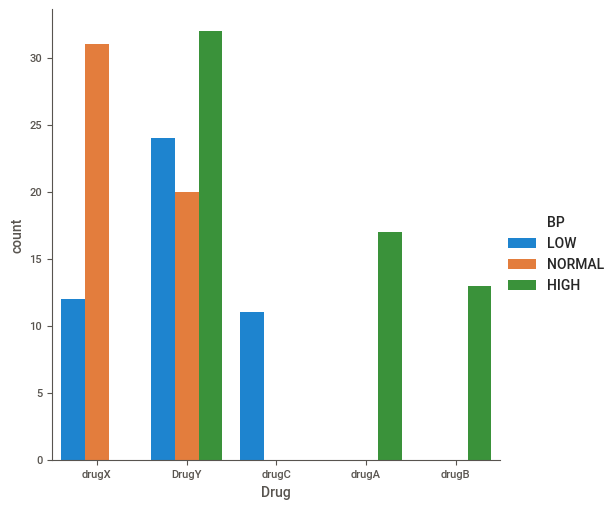

In [379]:
sns.factorplot('Drug', data=drug_master_data, hue='BP', kind='count')

**Q: What is the breakdown of Drugs taken with respect to Cholesterol?**

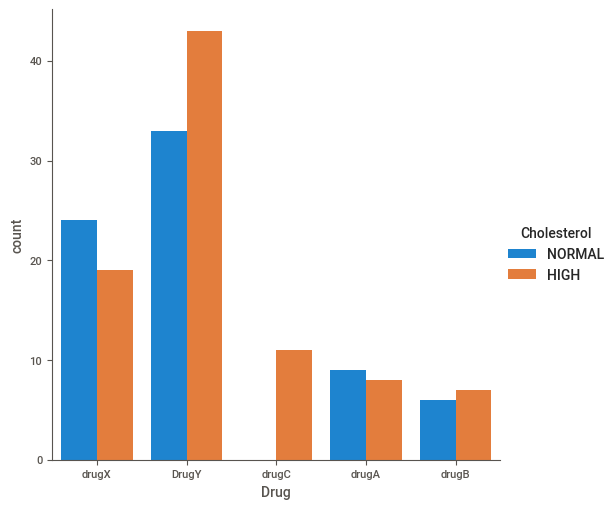

In [380]:
sns.factorplot('Drug', data=drug_master_data, hue='Cholesterol', kind='count')

**Q: What is the breakdown of BP?**

In [381]:
drug_master_data['BP'].value_counts()

HIGH      62
NORMAL    51
LOW       47
Name: BP, dtype: int64

<AxesSubplot:xlabel='BP', ylabel='count'>

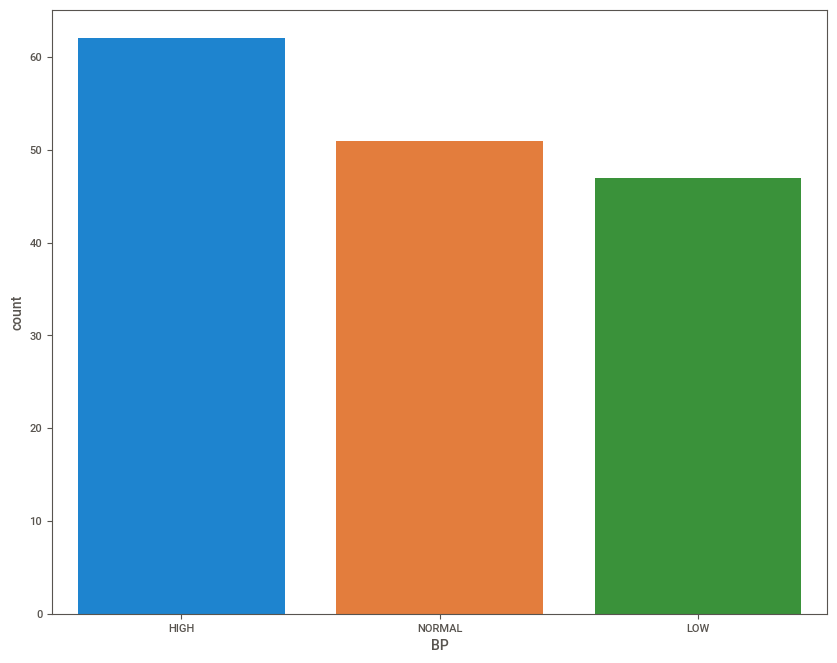

In [382]:
plt.figure(figsize=(10,8))
sns.countplot(x='BP',data=drug_master_data,order=drug_master_data['BP'].value_counts().index)

**Q: What is the breakdown of BP with respect to Age and Na_to_K?**

<AxesSubplot:xlabel='BP'>

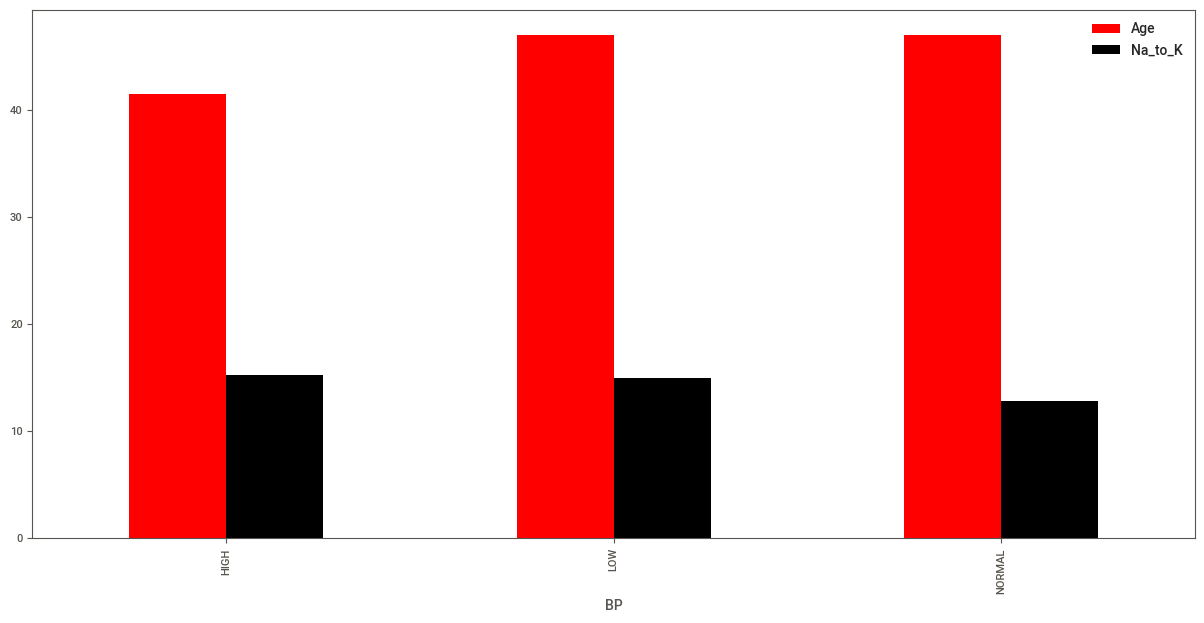

In [383]:
drug_master_data.groupby(['BP'])[['Age','Na_to_K']].median().plot(kind='bar', figsize=(15, 7), color=['red','black'])

**Q: What is the breakdown of Sex?**

In [384]:
drug_master_data['Sex'].value_counts()

M    83
F    77
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

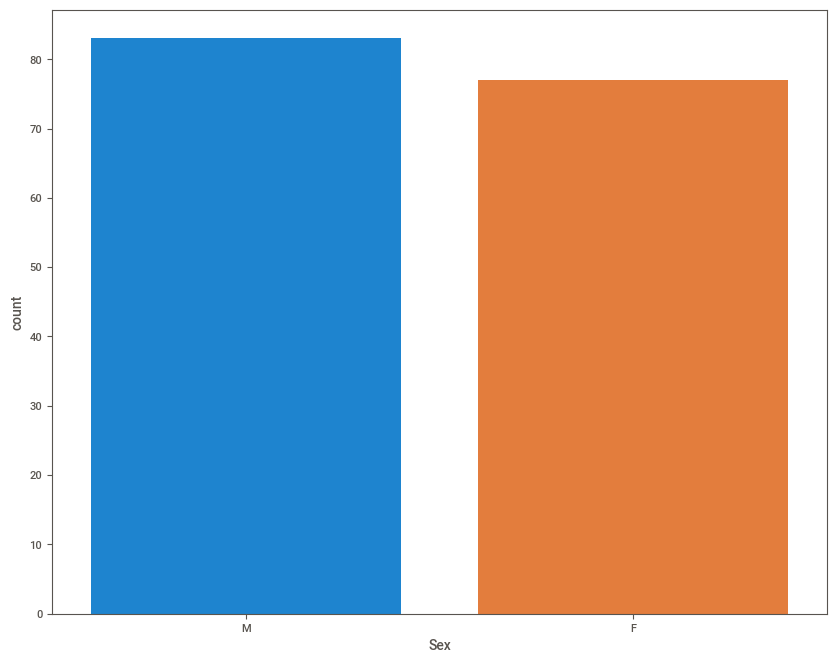

In [385]:
plt.figure(figsize=(10,8))
sns.countplot(x='Sex',data=drug_master_data,order=drug_master_data['Sex'].value_counts().index)

**Q: What is the breakdown of Sex with respect to Age and Na_to_K?**

<AxesSubplot:xlabel='Sex'>

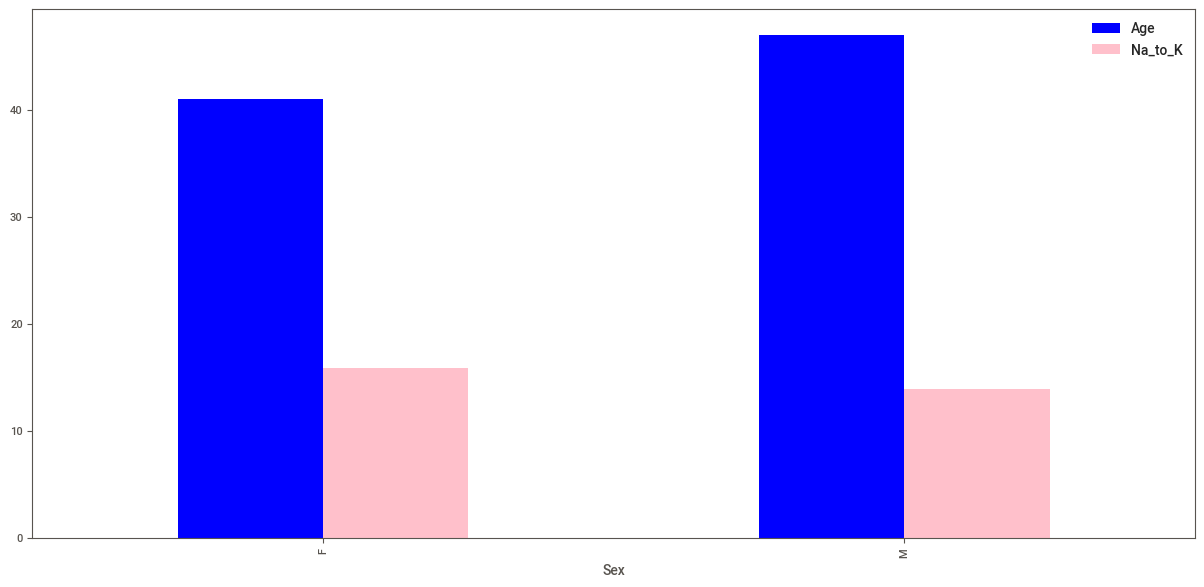

In [386]:
drug_master_data.groupby(['Sex'])[['Age','Na_to_K']].median().plot(kind='bar', figsize=(15, 7), color=['blue','pink'])

**Q: What is the breakdown of Cholesterol?**

In [387]:
drug_master_data['Cholesterol'].value_counts()

HIGH      88
NORMAL    72
Name: Cholesterol, dtype: int64

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

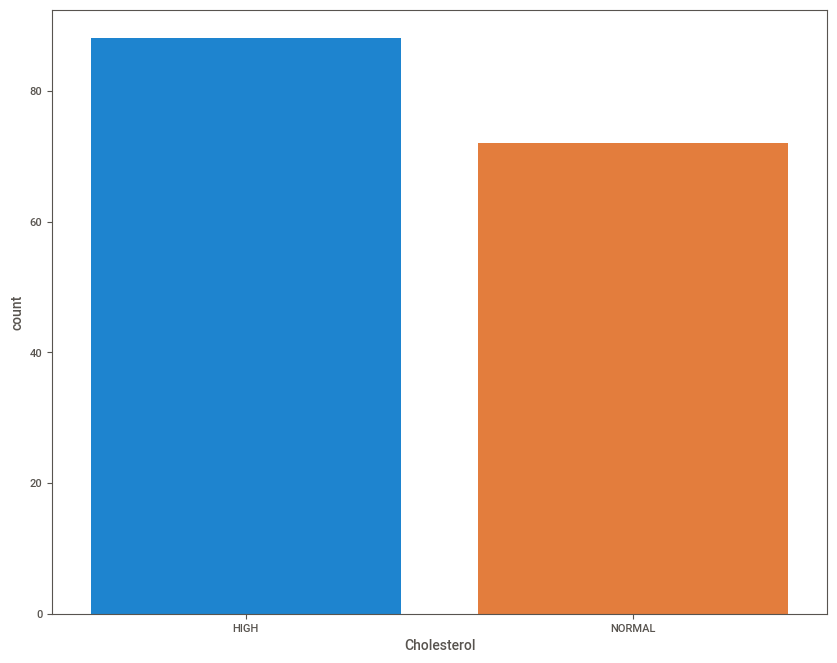

In [388]:
plt.figure(figsize=(10,8))
sns.countplot(x='Cholesterol',data=drug_master_data,order=drug_master_data['Cholesterol'].value_counts().index)

**Q: What is the breakdown of Cholesterol with respect to Age and Na_to_K?**

<AxesSubplot:xlabel='Cholesterol'>

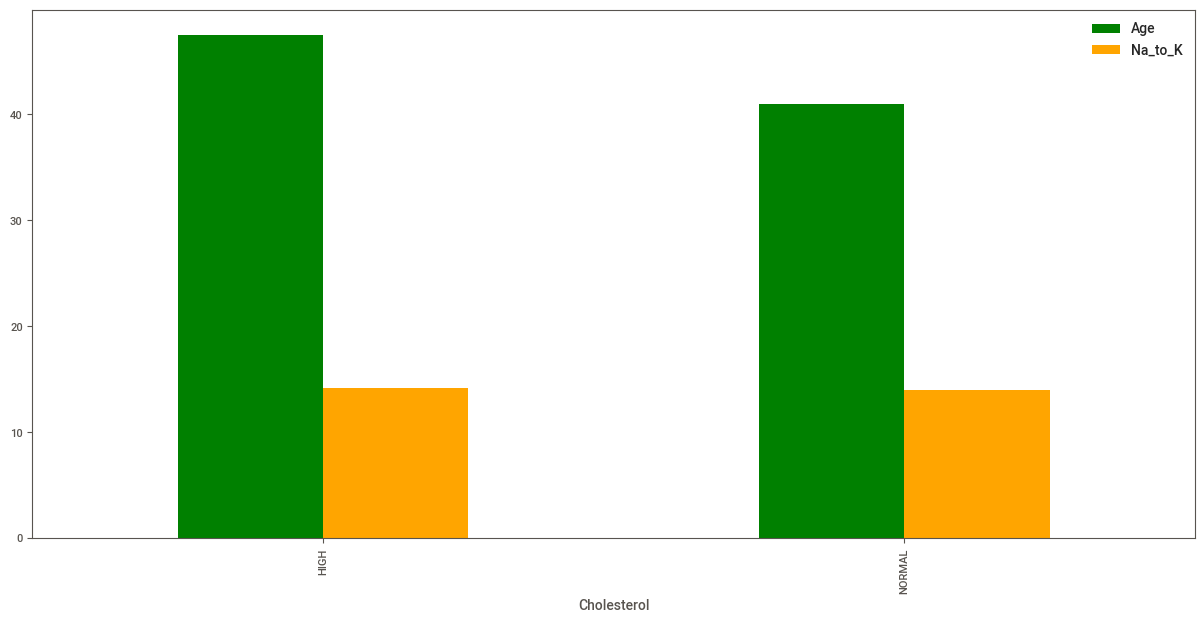

In [389]:
drug_master_data.groupby(['Cholesterol'])[['Age','Na_to_K']].median().plot(kind='bar', figsize=(15, 7), color=['green','orange'])

**Below are various plots for Numeric feature distribution to get different view point for better data understanding**

<Figure size 1000x800 with 0 Axes>

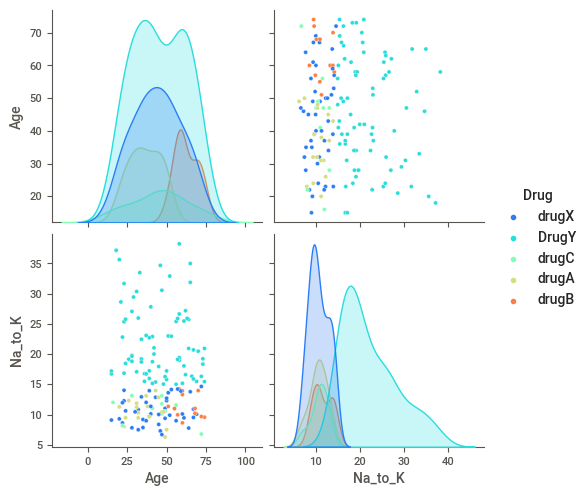

In [390]:
plt.figure(figsize=(10,8))
sns.pairplot(drug_master_data[['Age', 'Na_to_K', 'Drug']],palette='rainbow',diag_kind='kde',hue="Drug")

<Figure size 1000x800 with 0 Axes>

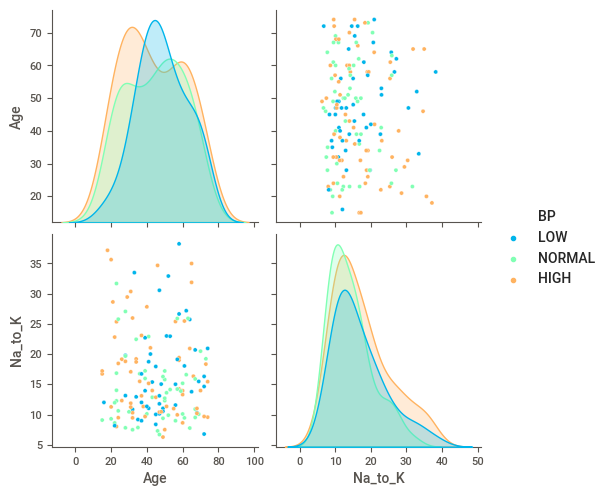

In [391]:
plt.figure(figsize=(10,8))
sns.pairplot(drug_master_data[['Age', 'Na_to_K', 'BP']],palette='rainbow',diag_kind='kde',hue="BP")

<Figure size 1000x800 with 0 Axes>

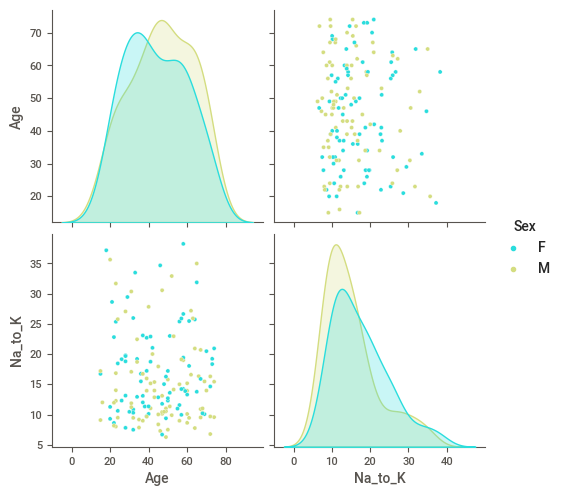

In [392]:
plt.figure(figsize=(10,8))
sns.pairplot(drug_master_data[['Age', 'Na_to_K', 'Sex']],palette='rainbow',diag_kind='kde',hue="Sex")

<Figure size 1000x800 with 0 Axes>

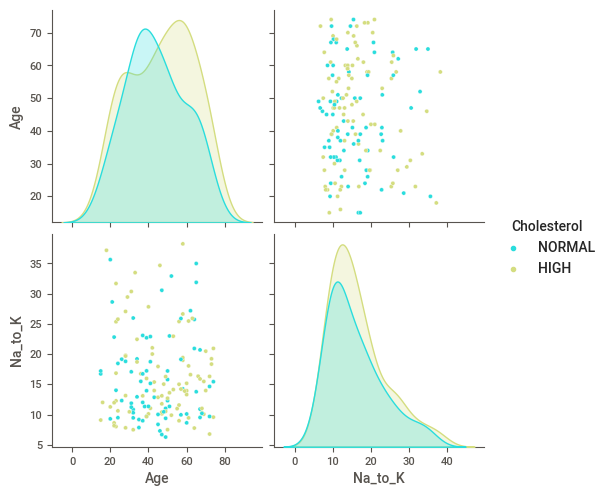

In [393]:
plt.figure(figsize=(10,8))
sns.pairplot(drug_master_data[['Age', 'Na_to_K', 'Cholesterol']],palette='rainbow',diag_kind='kde',hue="Cholesterol")

Text(0.5, 1.0, 'Correlation between Numerical features and target variable')

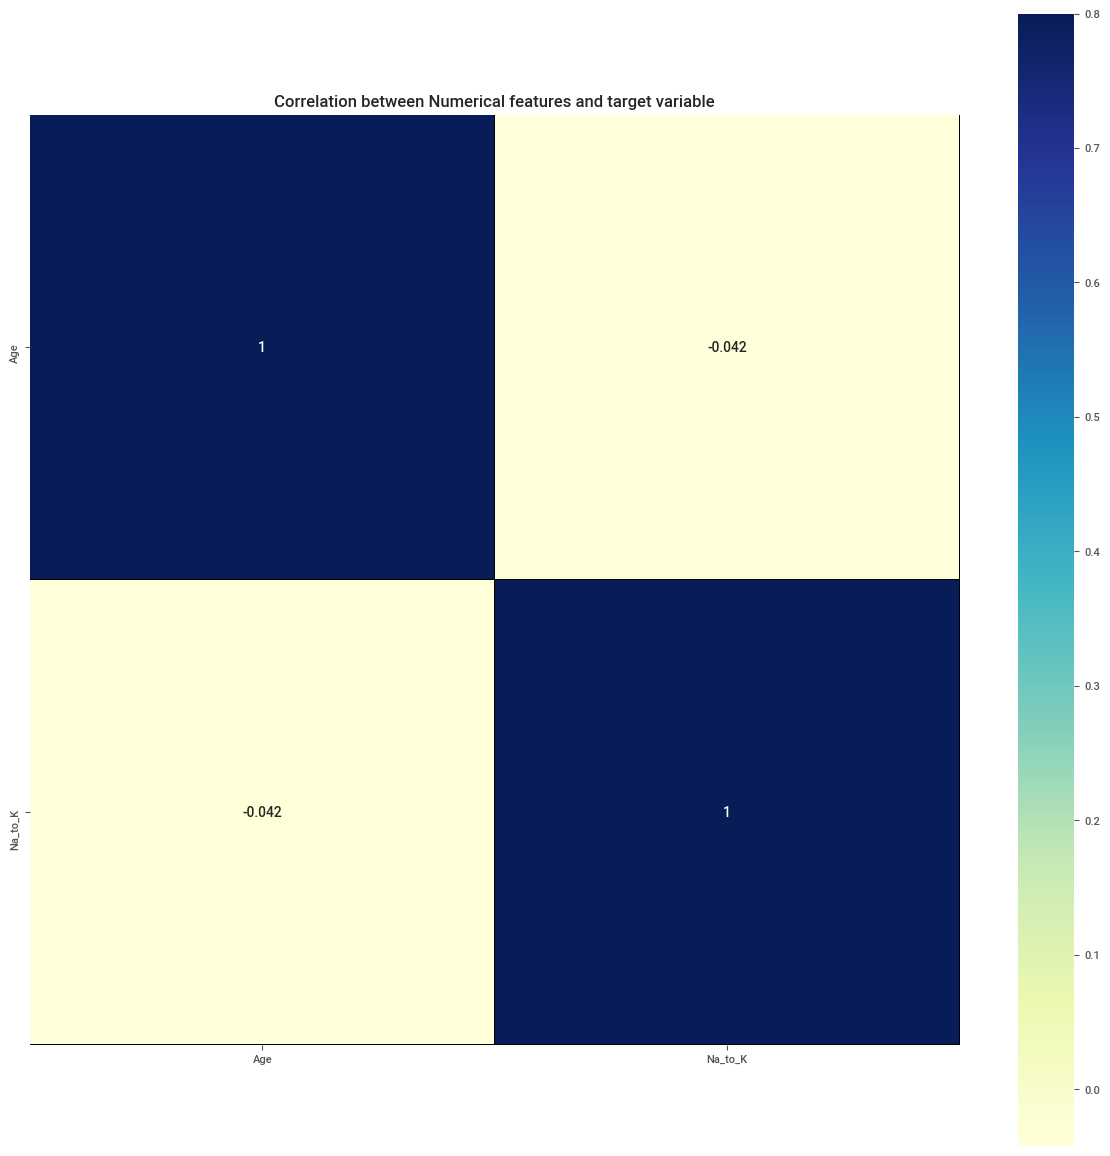

In [394]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = drug_master_data.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features and target variable')

**Observations:**

- There is not much correlation shown between Age and Na_to_K

In [395]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
drug_master_data.cov()

,Age,Na_to_K
Age,259.257704,-4.948461
Na_to_K,-4.948461,52.630515


<a name = Section7></a>

---
# **7. Data Post-Processing**
---



<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [396]:
drug_master_data.replace(to_replace={'drugA': 3, 'drugB': 4, 'drugC': 2, 'drugX': 0, 'DrugY': 1}, inplace=True)

In [397]:
drug_master_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Id,,,,,,
79,32,F,LOW,NORMAL,10.840,0
197,52,M,NORMAL,HIGH,9.894,0
38,39,F,NORMAL,NORMAL,9.709,0
24,33,F,LOW,HIGH,33.486,1
122,34,M,NORMAL,HIGH,22.456,1


In [398]:
drug_master_data['Drug'].value_counts()

1    76
0    43
3    17
4    13
2    11
Name: Drug, dtype: int64

In [399]:
drug_master_data_encoded = pd.get_dummies(drug_master_data, columns=['Sex','BP', 'Cholesterol'], drop_first=True)

In [400]:
drug_master_data_encoded.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
Id,,,,,,,
79,32,10.840,0,0,1,0,1
197,52,9.894,0,1,0,1,0
38,39,9.709,0,0,0,1,1
24,33,33.486,1,0,1,0,0
122,34,22.456,1,1,0,1,0


In [401]:
drug_master_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 160 non-null    int64  
 1   Na_to_K             160 non-null    float64
 2   Drug                160 non-null    int64  
 3   Sex_M               160 non-null    uint8  
 4   BP_LOW              160 non-null    uint8  
 5   BP_NORMAL           160 non-null    uint8  
 6   Cholesterol_NORMAL  160 non-null    uint8  
dtypes: float64(1), int64(2), uint8(4)
memory usage: 10.6 KB


In [402]:
y= drug_master_data_encoded['Drug']

In [403]:
drug_master_data_encoded.drop(columns=['Drug'],inplace=True)

In [404]:
drug_master_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 160 non-null    int64  
 1   Na_to_K             160 non-null    float64
 2   Sex_M               160 non-null    uint8  
 3   BP_LOW              160 non-null    uint8  
 4   BP_NORMAL           160 non-null    uint8  
 5   Cholesterol_NORMAL  160 non-null    uint8  
dtypes: float64(1), int64(1), uint8(4)
memory usage: 9.4 KB


In [405]:
drug_test_data_encoded = pd.get_dummies(drug_test_data, columns=['Sex','BP', 'Cholesterol'], drop_first=True)

In [406]:
drug_test_data_encoded.head(10)

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
Id,,,,,,
95,36,11.424,1,1,0,1
15,16,15.516,0,0,0,1
30,18,8.750,0,0,1,1
158,59,10.444,0,1,0,0
128,47,33.542,1,1,0,1
115,51,18.295,1,0,0,0
69,18,24.276,0,0,0,1
170,28,12.879,0,0,1,0
174,42,12.766,1,0,0,1


In [407]:
drug_test_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 40 non-null     int64  
 1   Na_to_K             40 non-null     float64
 2   Sex_M               40 non-null     uint8  
 3   BP_LOW              40 non-null     uint8  
 4   BP_NORMAL           40 non-null     uint8  
 5   Cholesterol_NORMAL  40 non-null     uint8  
dtypes: float64(1), int64(1), uint8(4)
memory usage: 1.1 KB


<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [408]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(drug_master_data_encoded, y, test_size=0.25, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (120, 6)
y_train shape:  (120,)
X_test shape:  (40, 6)
y_test shape:  (40,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 153 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 120 non-null    int64  
 1   Na_to_K             120 non-null    float64
 2   Sex_M               120 non-null    uint8  
 3   BP_LOW              120 non-null    uint8  
 4   BP_NORMAL           120 non-null    uint8  
 5   Cholesterol_NORMAL  120 non-null    uint8  
dtypes: float64(1), int64(1), uint8(4)
memory usage: 3.3 KB


,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
Id,,,,,,
153,72,14.642,0,1,0,1
52,62,27.183,1,1,0,1
146,37,12.006,0,1,0,1
12,43,15.376,1,1,0,0
139,69,10.065,0,0,1,0


<a name = Section73></a>
### **7.3 Data Scaling**

- Trying to evaluate model without any scaling of data.

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression, DecisionTree Classifier, RandomForest Classifier and Naive Bayes model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop Logistic Regression classification model using default setting.

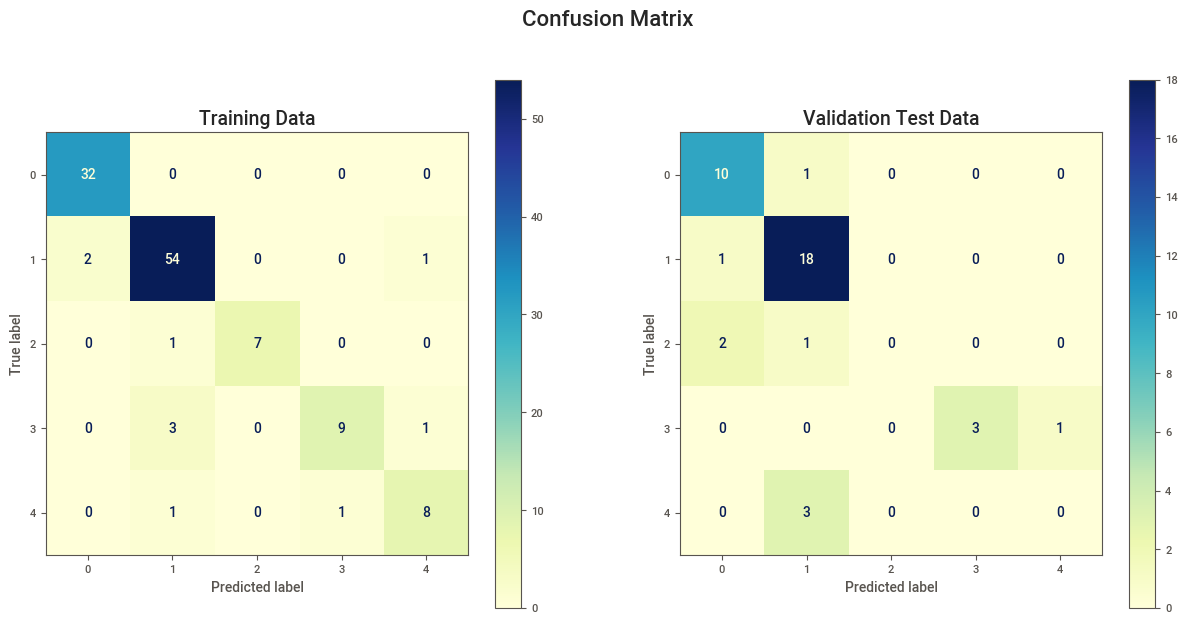

In [409]:
# Instantiate a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Predicting training and testing labels
y_train_pred_count = logreg.predict(X_train)
y_test_pred_count = logreg.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=logreg, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=logreg, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [410]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count))

Accuracy score for test validation data is: 0.775


In [411]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Data Report          ')
print(train_report)
print('                    Test Validation Data Report           ')
print(test_report)

                    Training Data Report          
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       0.92      0.95      0.93        57
           2       1.00      0.88      0.93         8
           3       0.90      0.69      0.78        13
           4       0.80      0.80      0.80        10

    accuracy                           0.92       120
   macro avg       0.91      0.86      0.88       120
weighted avg       0.92      0.92      0.91       120

                    Test Validation Data Report           
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.78      0.95      0.86        19
           2       0.00      0.00      0.00         3
           3       1.00      0.75      0.86         4
           4       0.00      0.00      0.00         3

    accuracy                           0.78        40
   macro avg       0.

In [412]:
 #roc_disp= plot_roc_curve(logreg, X_test, y_test)

- In this section we will **develop a Decision Tree model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **F1 Score** score as required by this project.

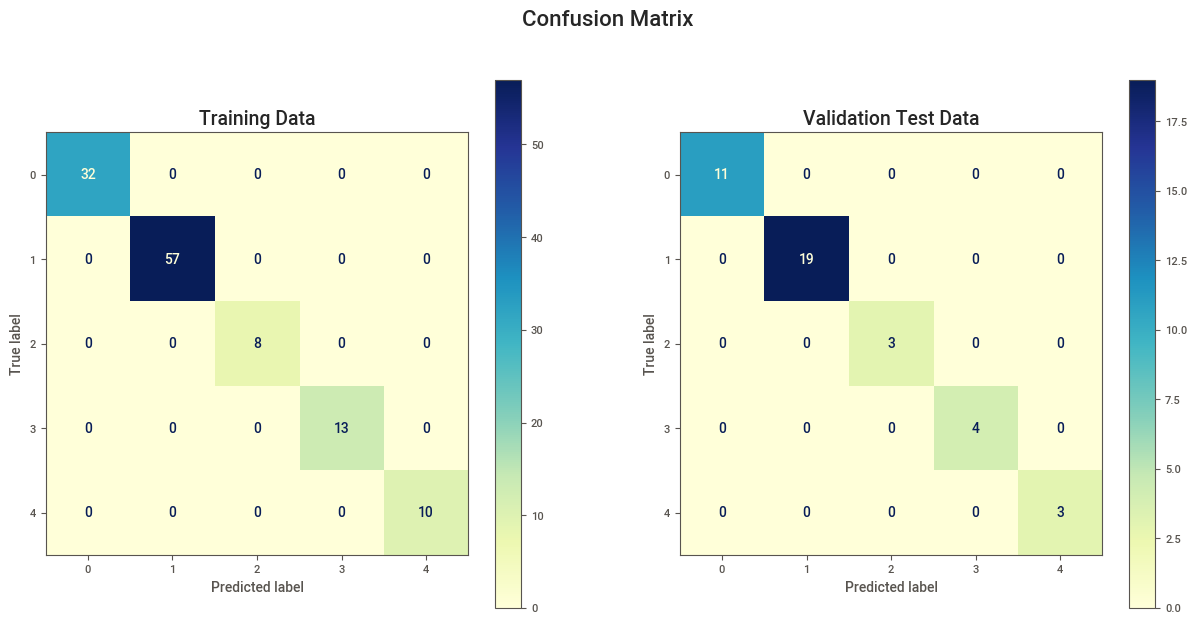

In [413]:
# Instantiate a decision tree classifier
dtc = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dtc.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count_dtc = dtc.predict(X_train)
y_test_pred_count_dtc = dtc.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=dtc, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=dtc, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [414]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count_dtc))

Accuracy score for test validation data is: 1.0


In [415]:
train_report_dtc = classification_report(y_train, y_train_pred_count_dtc)
test_report_dtc = classification_report(y_test, y_test_pred_count_dtc)
print('                    Training Data Report          ')
print(train_report_dtc)
print('                    Test Validation Data Report           ')
print(test_report_dtc)

                    Training Data Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        10

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

                    Test Validation Data Report           
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.

In [416]:
#roc_disp= plot_roc_curve(dtc, X_test, y_test)

- In this section we will **develop a Random Forest model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **F1 Score** score as required by this project.

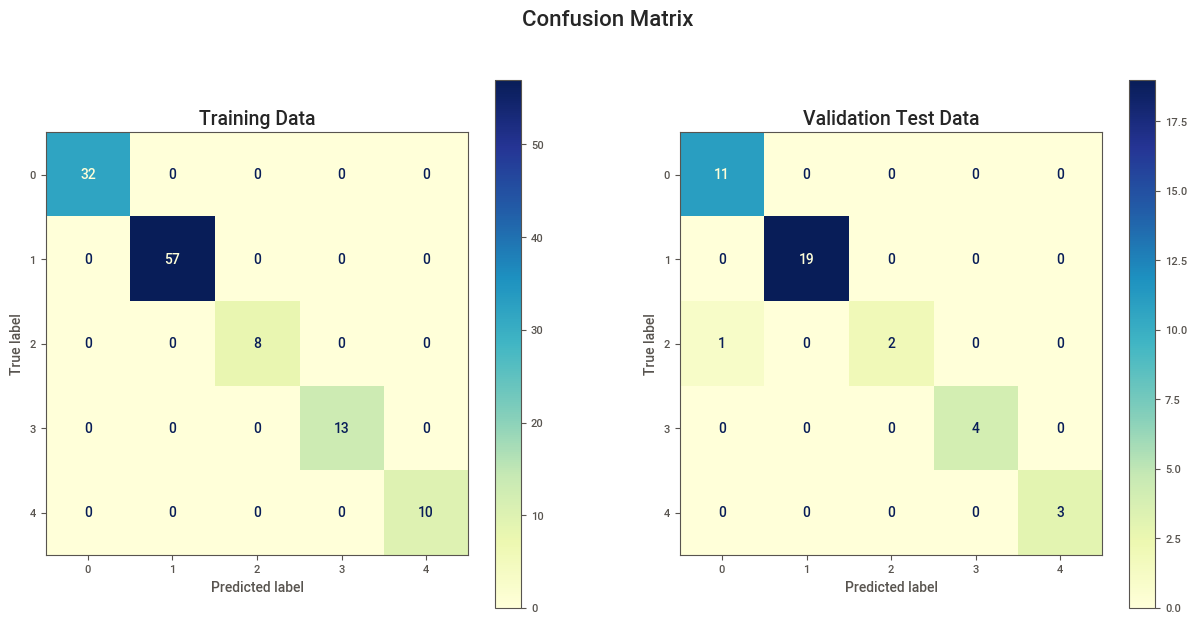

In [417]:
# Instantiate a random forest classifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count_clf = clf.predict(X_train)
y_test_pred_count_clf = clf.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=clf, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [418]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count_clf))

Accuracy score for test validation data is: 0.975


In [419]:
train_report_clf = classification_report(y_train, y_train_pred_count_clf)
test_report_clf = classification_report(y_test, y_test_pred_count_clf)
print('                    Training Data Report          ')
print(train_report_clf)
print('                    Test Validation Data Report           ')
print(test_report_clf)

                    Training Data Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        10

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

                    Test Validation Data Report           
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      1.00      1.00        19
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3

    accuracy                           0.97        40
   macro avg       0.

In [420]:
#roc_disp= plot_roc_curve(clf, X_test, y_test)

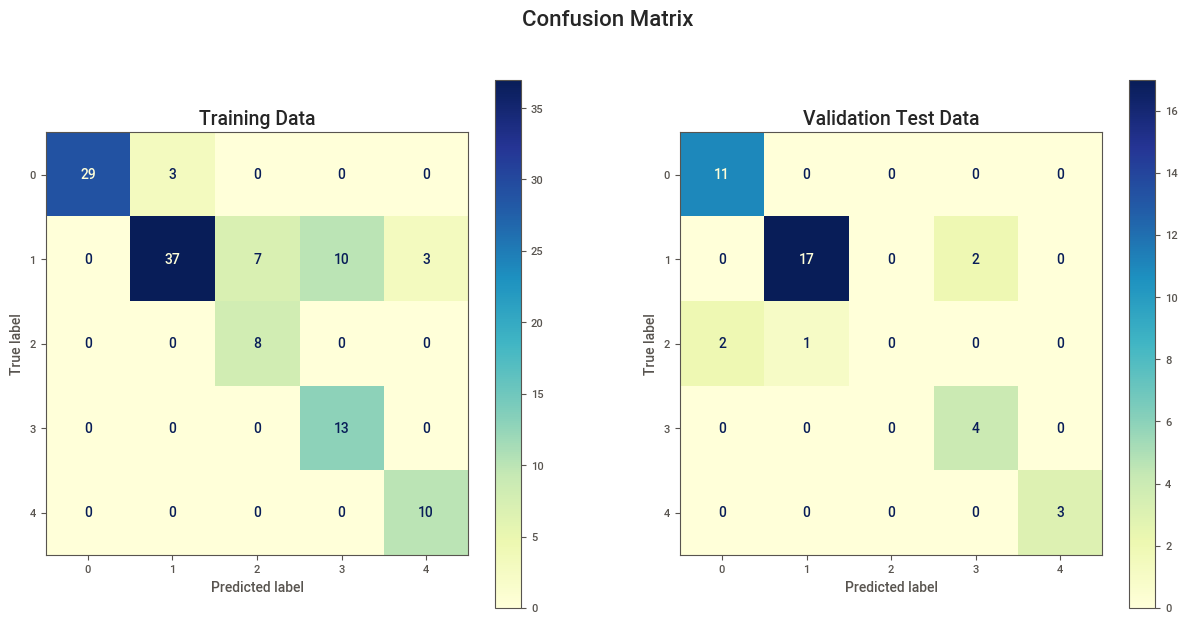

In [421]:
# Instantiate a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB     
naive = GaussianNB()
naive.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count_naive = naive.predict(X_train)
y_test_pred_count_naive = naive.predict(X_test)

#y_train_pred_proba = naive.predict_proba(X_train)
#y_test_pred_proba = naive.predict_proba(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator = naive, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [422]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count_naive))

Accuracy score for test validation data is: 0.875


In [423]:
train_report_clf = classification_report(y_train, y_train_pred_count_naive)
test_report_clf = classification_report(y_test, y_test_pred_count_naive)
print('                    Training Data Report          ')
print(train_report_clf)
print('                    Test Validation Data Report           ')
print(test_report_clf)

                    Training Data Report          
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.93      0.65      0.76        57
           2       0.53      1.00      0.70         8
           3       0.57      1.00      0.72        13
           4       0.77      1.00      0.87        10

    accuracy                           0.81       120
   macro avg       0.76      0.91      0.80       120
weighted avg       0.87      0.81      0.81       120

                    Test Validation Data Report           
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.94      0.89      0.92        19
           2       0.00      0.00      0.00         3
           3       0.67      1.00      0.80         4
           4       1.00      1.00      1.00         3

    accuracy                           0.88        40
   macro avg       0.

In [424]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred = logreg.predict(drug_test_data_encoded)
y_test_pred
#print (y_test_pred.shape)
#print (y_test_pred)

array([0, 1, 0, 0, 1, 1, 1, 0, 3, 0, 1, 0, 1, 1, 4, 1, 4, 0, 0, 1, 4, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 3, 1, 0, 1, 1, 3], dtype=int64)

In [425]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_dtc = dtc.predict(drug_test_data_encoded)
y_test_pred_dtc
#print (y_test_pred.shape)
#print (y_test_pred)

array([0, 1, 0, 2, 1, 1, 1, 0, 3, 0, 3, 0, 1, 3, 4, 1, 4, 0, 2, 1, 4, 0,
       0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 3, 1, 0, 3, 1, 3], dtype=int64)

In [426]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_clf = clf.predict(drug_test_data_encoded)
y_test_pred_clf
#print (y_test_pred.shape)
#print (y_test_pred)

array([0, 1, 0, 2, 1, 1, 1, 0, 3, 0, 3, 0, 1, 3, 4, 1, 4, 0, 0, 1, 4, 0,
       0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 3, 1, 0, 3, 1, 3], dtype=int64)

In [427]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_naive = naive.predict(drug_test_data_encoded)
y_test_pred_naive
#print (y_test_pred.shape)
#print (y_test_pred)

array([0, 3, 0, 0, 1, 3, 1, 0, 3, 0, 3, 0, 2, 3, 4, 1, 4, 0, 0, 1, 4, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 3, 3], dtype=int64)

In [428]:
output = pd.DataFrame({'Id': drug_test_data_encoded.index,'label': y_test_pred})
output.to_csv('drug-prediction-submission1.csv', index=False, header=False)

In [429]:
output = pd.DataFrame({'Id': drug_test_data_encoded.index,'label': y_test_pred_dtc})
output.to_csv('drug-prediction-submission2.csv', index=False, header=False)

In [430]:
output = pd.DataFrame({'Id': drug_test_data_encoded.index,'label': y_test_pred_clf})
output.to_csv('drug-prediction-submission3.csv', index=False, header=False)

In [431]:
output = pd.DataFrame({'Id': drug_test_data_encoded.index,'label': y_test_pred_naive})
output.to_csv('drug-prediction-submission4.csv', index=False, header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Model with best Accuracy Score was used for model evaluation and prediction considering this is ML Intermediate project.
- Accuracy Score was used to arrive at model evaluation which indicates good score for Test Validation data used.
- Correlation Heatmap shows linear relationship between Numeric features and Target Variable.
- Below we have comparison with Logistic, Decision Tree, Random Forest and Naive Bayes model.



|Sl. No.|| Model Name || Accuracy|
|----||---------||------------|
|1|| Logistic Regression Model|| 0.775|
|2|| Decision Tree Model|| 1.0|
|3|| Random Forest Model|| 0.975|
|4|| Naive Bayes Model|| 0.875|